In [2]:
import numpy as np
import pandas
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
import os
os.environ["LANG"] = "en_US.UTF-8"
import chromedriver_autoinstaller
import matplotlib.pyplot as plt
import bs4
import requests
from unidecode import unidecode
import re
import pandas as pd


In [3]:
star_list = ['Absolutno', 'Acamar', 'Achernar', 'Achird', 'Acrab', 'Acrux', 'Acubens', 'Adhafera', 'Adhara', 'Adhil', 'Epsilon Tauri', 'Ainalrami', 'Aladfar', 'Alasia', 'Albaldah', 'Albali', 'Albireo', 'Alchiba', 'Alcor', 'Alcyone', 'Aldebaran', 'Alderamin', 'Aldhanab', 'Aldhibah', 'Aldulfin', 'Alfirk', 'Algedi', 'Algenib', 'Algieba', 'Algol', 'Algorab', 'Alhena', 'Alioth', 'Aljanah', 'Alkaid', 'Alkalurops', 'Alkaphrah', 'Alkarab', 'Alkes', 'Almaaz', 'Almach', 'Alnair', 'Alnasl', 'Alnilam', 'Alnitak', 'Alniyat', 'Alphard', 'Alphecca', 'Alpheratz', 'Alpherg', 'Alrakis', 'Alrescha', 'Alruba', 'Alsafi', 'Alsciaukat', 'Alsephina', 'Alshain', 'Alshat', 'Altair', 'Altais', 'Alterf', 'Aludra', 'Alula Australis', 'Alula Borealis', 'Alya', 'Alzirr', 'Amadioha', 'Amansinaya', 'Anadolu', 'Ancha', 'Angetenar', 'Aniara', 'Ankaa', 'Anser', 'Antares', 'Arcalís', 'Arcturus', 'Arkab Posterior', 'Arkab Prior', 'Arneb', 'Ascella', 'Asellus Australis', 'Asellus Borealis', 'Ashlesha', 'Aspidiske', 'Asterope', 'Atakoraka', 'Athebyne', 'Atik', 'Atlas', 'Atria', 'Avior', 'Axólotl', 'Ayeyarwady', 'Azelfafage', 'Azha', 'Azmidi', 'Baekdu', "Barnard's Star", 'Baten Kaitos', 'Beemim', 'Beid', 'Belel', 'Bellatrix', 'Berehynia', 'Betelgeuse', 'Bharani', 'Bibhā', 'Biham', 'Bosona', 'Botein', 'Brachium', 'Bubup', 'Buna', 'Bunda', 'Bélénos', 'Canopus', 'Capella', 'Caph', 'Castor', 'Castula', 'Cebalrai', 'Ceibo', 'Celaeno', 'Cervantes', 'Chalawan', 'Chamukuy', 'Chaophraya', 'Chara', 'Chasoň', 'Chechia', 'Chertan', 'Citadelle', 'Citalá', 'Cocibolca', 'Copernicus', 'Cor Caroli', 'Cujam', 'Cursa', 'Dabih', 'Dalim', 'Deneb', 'Deneb Algedi', 'Denebola', 'Diadem', 'Dingolay', 'Diphda', 'Diya', 'Dofida', 'Dombay', 'Dschubba', 'Dubhe', 'Dziban', 'Dìwö', 'Ebla', 'Edasich', 'Electra', 'Elgafar', 'Elkurud', 'Elnath', 'Eltanin', 'Emiw', 'Enif', 'Errai', 'Fafnir', 'Fang', 'Fawaris', 'Felis', 'Felixvarela', 'Flegetonte', 'Fomalhaut', 'Formosa', 'Franz', 'Fulu', 'Fumalsamakah', 'Funi', 'Furud', 'Fuyue', 'Gacrux', 'Gakyid', 'Geminga', 'Giausar', 'Gienah', 'Ginan', 'Gloas', 'Gomeisa', 'Grumium', 'Gudja', 'Gumala', 'Guniibuu', 'Hadar', 'Haedus', 'Hamal', 'Hassaleh', 'Hatysa', 'Helvetios', 'Heze', 'Hoggar', 'Homam', 'Horna', 'Hunahpú', 'Hunor', 'Iklil', 'Illyrian', 'Imai', 'Inquill', 'Intan', 'Intercrus', 'Irena', 'Itonda', 'Izar', 'Jabbah', 'Jishui', 'Kaffaljidhma', 'Kalausi', 'Kamuy', 'Kang', 'Karaka', 'Kaus Australis', 'Kaus Borealis', 'Kaus Media', 'Kaveh', 'Keid', 'Khambalia', 'Kitalpha', 'Kochab', 'Koeia', 'Koit', 'Kornephoros', 'Kraz', 'Kurhah', 'La Superba', 'Larawag', 'Lerna', 'Lesath', 'Libertas', 'Lich', 'Liesma', 'Lilii Borea', 'Lionrock', 'Lucilinburhuc', 'Lusitânia', 'Maasym', 'Macondo', 'Mago', 'Mahasim', 'Mahsati', 'Maia', 'Malmok', 'Marfik', 'Markab', 'Markeb', 'Marsic', 'Matar', 'Mazaalai', 'Mebsuta', 'Megrez', 'Meissa', 'Mekbuda', 'Meleph', 'Menkalinan', 'Menkar', 'Menkent', 'Menkib', 'Merak', 'Merga', 'Meridiana', 'Merope', 'Mesarthim', 'Miaplacidus', 'Mimosa', 'Minchir', 'Minelauva', 'Mintaka', 'Mira', 'Mirach', 'Miram', 'Mirfak', 'Mirzam', 'Misam', 'Mizar', 'Moldoveanu', 'Montuno', 'Morava', 'Moriah', 'Mothallah', 'Mouhoun', 'Mpingo', 'Muliphein', 'Muphrid', 'Muscida', 'Musica', 'Muspelheim', 'Márohu', 'Mönch', 'Nahn', 'Naledi', 'Naos', 'Nashira', 'Natasha', 'Nekkar', 'Nembus', 'Nenque', 'Nervia', 'Nihal', 'Nikawiy', 'Nosaxa', 'Nunki', 'Nusakan', 'Nushagak', 'Nyamien', 'Násti', 'Ogma', 'Okab', 'Paikauhale', 'Parumleo', 'Peacock', 'Petra', 'Phact', 'Phecda', 'Pherkad', 'Phoenicia', 'Piautos', 'Pincoya', 'Pipirima', 'Pipoltr', 'Pleione', 'Poerava', 'Polaris', 'Polaris Australis', 'Polis', 'Pollux', 'Porrima', 'Praecipua', 'Prima Hyadum', 'Procyon', 'Propus', 'Proxima Centauri', 'Epsilon Eridani', 'Rana', 'Rapeto', 'Rasalas', 'Rasalgethi', 'Rasalhague', 'Rastaban', 'Regulus', 'Revati', 'Rigel', 'Rigil Kentaurus', 'Rosaliadecastro', 'Rotanev', 'Ruchbah', 'Rukbat', 'Sabik', 'Saclateni', 'Sadachbia', 'Sadalbari', 'Sadalmelik', 'Sadalsuud', 'Sadr', 'Sagarmatha', 'Saiph', 'Salm', 'Sansuna', 'Sargas', 'Sarin', 'Sceptrum', 'Scheat', 'Schedar', 'Secunda Hyadum', 'Segin', 'Seginus', 'Sham', 'Shama', 'Sharjah', 'Shaula', 'Sheliak', 'Sheratan', 'Sika', 'Sirius', 'Situla', 'Skat', 'Solaris', 'Spica', 'Sterrennacht', 'Stribor', 'Sualocin', 'Subra', 'Suhail', 'Sulafat', 'Syrma', 'Sāmaya', 'Tabit', 'Taika', 'Taiyangshou', 'Taiyi', 'Talitha', 'Tangra', 'Tania Australis', 'Tania Borealis', 'Tapecue', 'Tarazed', 'Tarf', 'Taygeta', 'Tegmine', 'Tejat', 'Terebellum', 'Tevel', 'Theemin', 'Thuban', 'Tiaki', 'Tianguan', 'Tianyi', 'Timir', 'Tislit', 'Titawin', 'Tojil', 'Toliman', 'Tonatiuh', 'Torcular', 'Tuiren', 'Tupi', 'Tupã', 'Tureis', 'Ukdah', 'Uklun', 'Unukalhai', 'Unurgunite', 'Uruk', 'Vega', 'Veritate', 'Vindemiatrix', 'Wasat', 'Wazn', 'Wezen', 'Wurren', 'Xamidimura', 'Xihe', 'Xuange', 'Yed Posterior', 'Yed Prior', 'Yildun', 'Zaniah', 'Zaurak', 'Zavijava', 'Zhang', 'Zibal', 'Zosma', 'Zubenelgenubi', 'Zubenelhakrabi', 'Zubeneschamali']
def replace_special_characters(text):
    # Replace special characters with their closest ASCII equivalent
    text_ascii = unidecode(text)
    
    # Remove any remaining non-alphanumeric characters
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s\'.,?!]', '', text_ascii)
    
    return cleaned_text
for i in range(len(star_list)): # Replace special characters so SIMBAD can find it
    star_list[i] = replace_special_characters(star_list[i])
print(star_list)
star_list.sort()
not_found = ["Acrab", "Alya", "Dabih", "Geminga", "Lich", "Marsic", "Mazaalai", "Pipoltr"]

['Absolutno', 'Acamar', 'Achernar', 'Achird', 'Acrab', 'Acrux', 'Acubens', 'Adhafera', 'Adhara', 'Adhil', 'Epsilon Tauri', 'Ainalrami', 'Aladfar', 'Alasia', 'Albaldah', 'Albali', 'Albireo', 'Alchiba', 'Alcor', 'Alcyone', 'Aldebaran', 'Alderamin', 'Aldhanab', 'Aldhibah', 'Aldulfin', 'Alfirk', 'Algedi', 'Algenib', 'Algieba', 'Algol', 'Algorab', 'Alhena', 'Alioth', 'Aljanah', 'Alkaid', 'Alkalurops', 'Alkaphrah', 'Alkarab', 'Alkes', 'Almaaz', 'Almach', 'Alnair', 'Alnasl', 'Alnilam', 'Alnitak', 'Alniyat', 'Alphard', 'Alphecca', 'Alpheratz', 'Alpherg', 'Alrakis', 'Alrescha', 'Alruba', 'Alsafi', 'Alsciaukat', 'Alsephina', 'Alshain', 'Alshat', 'Altair', 'Altais', 'Alterf', 'Aludra', 'Alula Australis', 'Alula Borealis', 'Alya', 'Alzirr', 'Amadioha', 'Amansinaya', 'Anadolu', 'Ancha', 'Angetenar', 'Aniara', 'Ankaa', 'Anser', 'Antares', 'Arcalis', 'Arcturus', 'Arkab Posterior', 'Arkab Prior', 'Arneb', 'Ascella', 'Asellus Australis', 'Asellus Borealis', 'Ashlesha', 'Aspidiske', 'Asterope', 'Atakora

In [3]:
# load distances.npy and make it into a list and then put it in distances.txt
distances = np.load("distances.npy")
distances = distances.tolist()
# write distances to distances.txt
with open("distances.txt", "w") as f:
    for i in distances:
        f.write(str(i) + "\n")

In [4]:
distances

[273.84505846592,
 49.431537320810676,
 42.75331338178709,
 5.923040746966515,
 98.71668311944718,
 54.554183214768905,
 71.23674106156993,
 124.22360248447205,
 68.47345284233302,
 543.8625115570784,
 425.531914893617,
 41.686815294058796,
 156.25,
 74.83965603694085,
 133.15579227696404,
 14.976875703913159,
 25.056376847907796,
 123.60939431396787,
 20.43318348998774,
 15.037593984962406,
 56.15453728661276,
 100.70493454179255,
 112.1717573949231,
 210.0840336134454,
 33.42916360232667,
 120.04801920768307,
 39.88831272437176,
 27.570995312930794,
 26.63115845539281,
 33.51206434316354,
 25.31004808909137,
 23.16053259960766,
 31.86743148502231,
 37.62807656561019,
 109.89010989010988,
 53.458497495469395,
 49.09348873058966,
 1012.2482032594392,
 120.48192771084337,
 30.96934035305048,
 29.700029700029702,
 606.0606060606061,
 225.73363431151242,
 213.67521367521366,
 55.279159756771705,
 23.00966405890474,
 29.744199881023203,
 114.50163164825099,
 27.434842249657063,
 46.1680517

In [71]:
stellar_data_I = pd.read_csv("stellar_data_Iab.csv")
stellar_data_I

,sp,T_eff,L/L_o,R/R_o
0,O5,40900,1140000,21.2
1,O6,38500,998000,22.4
2,O7,36200,877000,23.8
3,O8,34000,769000,25.3
4,B0,26200,429000,31.7
5,B1,21400,261000,37.3
6,B2,17600,157000,42.8
7,B3,16000,123000,45.8
8,B5,13600,79100,51.1
9,B6,12600,65200,53.8


In [5]:
stellar_data_III = pd.read_csv("stellar_data_III.csv")
stellar_data_III

,sp,T_eff,L/L_o,R/R_o
0,O5,39400,741000,18.5
1,O6,37800,519000,16.8
2,O7,36500,375000,15.4
3,O8,35000,277000,14.3
4,B0,29200,84700,11.4
5,B1,24500,32200,10.0
6,B2,20200,11100,8.6
7,B3,18300,6400,8.0
8,B5,15100,2080,6.7
9,B6,13800,1200,6.1


In [27]:
stellar_data_V = pd.read_csv("stellar_data_V.csv")
stellar_data_V

,sp,T_eff,L/L_o,R/R_o
0,O5,42000,499000.0000,13.40
1,O6,39500,324000.0000,12.20
2,O7,37500,216000.0000,11.00
3,O8,35800,147000.0000,10.00
4,B0,30000,32500.0000,6.70
5,B1,25400,9950.0000,5.20
6,B2,20900,2920.0000,4.10
7,B3,18800,1580.0000,3.80
8,B5,15200,480.0000,3.20
9,B6,13700,272.0000,2.90


In [67]:
if not (os.path.exists("distances.txt") and os.path.exists("image_urls.txt") and os.path.exists("star_data.csv") and os.path.exists("Star Images") and len(os.listdir("Star Images")) != 0 and len(os.listdir("Star Images")) == len(star_list) - len(not_found)):
    chromedriver_autoinstaller.install()
    options = Options()
    options.add_argument("--headless")
    driver = webdriver.Chrome(options=options)

    print("Getting images and distances in Chrome...")

    image_urls = []
    distances = []
    spectral_classes = []

    already_done = [file[:-4] for file in os.listdir("Star Images")]
    already_done.sort()

    for star in star_list:
        if star not in not_found:
            image_urls.append(f"https://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2FDSS2%2Fcolor&width=500&height=500&fov=1&projection=SIN&coordsys=icrs&rotation_angle=0.0&object={star}&format=jpg")
            with open("image_urls.txt", "w") as image_urls_file:
                for i in range(len(image_urls)):
                    image_urls_file.write(image_urls[i] + ("\n" if i != len(distances) - 1 else ""))
            # read in distances_file and convert to list
            preloaded_distances = []
            with open("distances.txt", "r") as distances_file:
                preloaded_distances = [float(line.strip()) for line in distances_file.readlines()]
        if star in already_done or star in not_found:
            continue

        print(f"Getting {star}...")
        driver.get(f"http://simbad.u-strasbg.fr/simbad/sim-basic?Ident={star}&submit=SIMBAD+search")
        try:
            element = driver.find_element(By.XPATH, '/html/body/div[4]/table[3]/tbody/tr[2]/td[2]/table/tbody/tr[2]/td/div/meta')

            distance = 1 / (float(driver.find_element(By.XPATH, '//*[@id="basic_data"]/table/tbody/tr[8]/td[2]/b[1]/tt').text.split(" ")[0]) / 1000)

            spectral_class = driver.find_element(By.XPATH, '//*[@id="basic_data"]/table/tbody/tr[9]/td[2]/b[1]/tt')

            image_url = f"https://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2FDSS2%2Fcolor&width=500&height=500&fov=1&projection=SIN&coordsys=icrs&rotation_angle=0.0&object={star}&format=jpg"

            image_urls.append(image_url)
            distances.append(distance)
            spectral_classes.append(spectral_class.text)
            print(distance, spectral_class.text, image_url)
            img_data = requests.get(image_url).content
            with open(f'Star Images/{star}.jpg', 'wb') as handler:
                handler.write(img_data)
        except NoSuchElementException:
            print(f"Could not find image/distance for {star}. Moving on to the next one...")

        # print("Image URL:", image_url)
        # print("Distance: " + str(distance) + " pc")

    # Close the WebDriver
    driver.quit()

    print(image_urls)
    print(distances)
    print(spectral_classes)

    with open("image_urls.txt", "w") as image_urls_file:
        for i in range(len(image_urls)):
            image_urls_file.write(image_urls[i] + ("\n" if i != len(distances) - 1 else ""))

    if preloaded_distances != [] and len(preloaded_distances) == len(distances):
        distances = preloaded_distances
    with open("distances.txt", "w") as distances_file:
        for i in range(len(distances)):
            distances_file.write(str(distances[i]) + ("\n" if i != len(distances) - 1 else ""))
    with open("spectral_classes.txt", "w") as spectral_classes_file:
        for i in range(len(spectral_classes)):
            spectral_classes_file.write(spectral_classes[i] + ("\n" if i != len(spectral_classes) - 1 else ""))
    
    # remove duplicates from image_urls
    image_urls = list(dict.fromkeys(image_urls))
    print(len(image_urls), len(distances), len(spectral_classes))

    star_data = pandas.DataFrame({
        "Star Name": [star for star in star_list if star not in not_found],
        "Distance (pc)": distances,
        # "Image URL": image_urls,
        "Spectral Class": spectral_classes
    })
    star_data["Index"] = [i for i in range(len(star_data))]
    star_data.to_csv("star_data.csv", index=False)
else:
    print("Skipping this step because the files already exist.")

Getting images and distances in Chrome...
Getting Absolutno...
273.84505846592 G8V ~ https://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2FDSS2%2Fcolor&width=500&height=500&fov=1&projection=SIN&coordsys=icrs&rotation_angle=0.0&object=Absolutno&format=jpg
Getting Acamar...
49.431537320810676 A2V C https://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2FDSS2%2Fcolor&width=500&height=500&fov=1&projection=SIN&coordsys=icrs&rotation_angle=0.0&object=Acamar&format=jpg
Getting Achernar...
42.75331338178709 B6Vpe C https://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2FDSS2%2Fcolor&width=500&height=500&fov=1&projection=SIN&coordsys=icrs&rotation_angle=0.0&object=Achernar&format=jpg
Getting Achird...
5.923040746966515 F9V C https://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2FDSS2%2Fcolor&width=500&height=500&fov=1&projection=SIN&coordsys=icrs&rotation_angle=0.0&object=Achird&format=jpg
Getting Acrux...
98.71668311944718 

In [10]:
spectral_classes = []

for star in star_list:
    if star in not_found:
        continue
    print(f"Getting Spectral Class for {star}...")
    chromedriver_autoinstaller.install()
    options = Options()
    options.add_argument("--headless")
    driver = webdriver.Chrome(options=options)
    driver.get(f"http://simbad.u-strasbg.fr/simbad/sim-basic?Ident={star}&submit=SIMBAD+search")
    try:
        element = driver.find_element(By.XPATH, '/html/body/div[4]/table[3]/tbody/tr[2]/td[2]/table/tbody/tr[2]/td/div/meta')

        spectral_class = driver.find_element(By.XPATH, '//*[@id="basic_data"]/table/tbody/tr[9]/td[2]/b[1]/tt')

        spectral_classes.append(spectral_class.text)
    except NoSuchElementException:
        print(f"Could not find spectral class for {star}. Moving on to the next one...")
        spectral_classes.append("404")

star_data["Spectral Class"] = spectral_classes
star_data.to_csv("star_data.csv", index=False)

Getting Spectral Class for Absolutno...
Getting Spectral Class for Acamar...
Getting Spectral Class for Achernar...
Getting Spectral Class for Achird...
Getting Spectral Class for Acrux...
Getting Spectral Class for Acubens...
Getting Spectral Class for Adhafera...
Getting Spectral Class for Adhara...
Getting Spectral Class for Adhil...
Getting Spectral Class for Ainalrami...
Getting Spectral Class for Aladfar...
Getting Spectral Class for Alasia...
Getting Spectral Class for Albaldah...
Getting Spectral Class for Albali...
Getting Spectral Class for Albireo...
Getting Spectral Class for Alchiba...
Getting Spectral Class for Alcor...
Getting Spectral Class for Alcyone...
Getting Spectral Class for Aldebaran...
Getting Spectral Class for Alderamin...
Getting Spectral Class for Aldhanab...
Getting Spectral Class for Aldhibah...
Getting Spectral Class for Aldulfin...
Getting Spectral Class for Alfirk...
Getting Spectral Class for Algedi...
Getting Spectral Class for Algenib...
Getting Spe

NameError: name 'star_data' is not defined

In [7]:
# if star_data.csv doesn't exist already
if not os.path.exists("star_data.csv"):
    images_file = open("image_urls.txt")
    distances_file = open("distances.txt")

    image_urls_list = images_file.read().split("\n")
    distances_list = distances_file.read().split("\n")

    # combine star name with the exception of those in the not_found list, image urls, and distances into a csv file
    star_data = pandas.DataFrame({
        "Star Name": [star for star in star_list if star not in not_found],
        "Distance (pc)": distances_list,
        "Image URL": image_urls_list
    })

    star_data.sort_values(by=["Star Name"], inplace=True)
    star_data.to_csv("star_data.csv", index=False)
elif os.path.exists("star_data.csv"):
    star_data = pd.read_csv("star_data.csv")
star_data

,Star Name,Distance (pc),Image URL,Spectral Class
0,Absolutno,273.845058,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '8', 'V')"
1,Acamar,49.431537,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '2', 'V')"
2,Achernar,42.753313,https://alasky.u-strasbg.fr/hips-image-service...,"('B', '6', 'V')"
3,Achird,5.923041,https://alasky.u-strasbg.fr/hips-image-service...,"('F', '9', 'V')"
4,Acubens,54.554183,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '7', 'V')"
...,...,...,...,...
299,Zavijava,11.001766,https://alasky.u-strasbg.fr/hips-image-service...,"('F', '9', 'V')"
300,Zhang,76.182930,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '7', 'III')"
301,Zibal,36.503011,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '4', 'V')"
302,Zubenelhakrabi,50.025013,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '8.5', 'III')"


In [69]:
star_data["Spectral Class"] = spectral_classes
star_data.to_csv("star_data.csv", index=False)
# # Change the star data where star name is "Ran" to "Epsilon Eridani"
# star_data.loc[star_data["Star Name"] == "Ran", "Star Name"] = "Epsilon Eridani"
# # Replace the distance with the correct value
# star_data.loc[star_data["Star Name"] == "Epsilon Eridani", "Distance (pc)"] = 3.219810333852474
# # Replace the Image URL with the correct one
# star_data.loc[star_data["Star Name"] == "Epsilon Eridani", "Image URL"] = "https://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2FDSS2%2Fcolor&width=500&height=500&fov=1&projection=SIN&coordsys=icrs&rotation_angle=0.0&object=Epsilon+Eridani&format=jpg"
# Write out each column to a separate file
# star_data.sort_values(by=["Star Name"], inplace=True)
# star_data["Distance (pc)"].to_csv("distances.txt", index=False)
# star_data["Image URL"].to_csv("image_urls.txt", index=False)
# star_data.to_csv("star_data.csv", index=False)
# star_data["Index"] = [i for i in range(len(star_data))]
star_data

,Star Name,Distance (pc),Image URL,Spectral Class
0,Absolutno,273.845058,https://alasky.u-strasbg.fr/hips-image-service...,"(G, 8, V)"
1,Acamar,49.431537,https://alasky.u-strasbg.fr/hips-image-service...,"(A, 2, V)"
2,Achernar,42.753313,https://alasky.u-strasbg.fr/hips-image-service...,"(B, 6, V)"
3,Achird,5.923041,https://alasky.u-strasbg.fr/hips-image-service...,"(F, 9, V)"
4,Acubens,54.554183,https://alasky.u-strasbg.fr/hips-image-service...,"(A, 7, V)"
...,...,...,...,...
299,Zavijava,11.001766,https://alasky.u-strasbg.fr/hips-image-service...,"(F, 9, V)"
300,Zhang,76.182930,https://alasky.u-strasbg.fr/hips-image-service...,"(G, 7, III)"
301,Zibal,36.503011,https://alasky.u-strasbg.fr/hips-image-service...,"(A, 4, V)"
302,Zubenelhakrabi,50.025013,https://alasky.u-strasbg.fr/hips-image-service...,"(G, 8.5, III)"


In [70]:
indices = list(star_data["Index"])
distances = list(star_data["Distance (pc)"].astype(float))
# sort distances and indices by distances
distances, indices = zip(*sorted(zip(distances, indices)))
# convert distances and indices to lists
distances = list(distances)
indices = list(indices)
plt.bar(star_data["Star Name"], distances)

,Star Name,Distance (pc),Image URL,Spectral Class
0,Absolutno,273.845058,https://alasky.u-strasbg.fr/hips-image-service...,"(G, 8, V)"
1,Acamar,49.431537,https://alasky.u-strasbg.fr/hips-image-service...,"(A, 2, V)"
2,Achernar,42.753313,https://alasky.u-strasbg.fr/hips-image-service...,"(B, 6, V)"
3,Achird,5.923041,https://alasky.u-strasbg.fr/hips-image-service...,"(F, 9, V)"
4,Acubens,54.554183,https://alasky.u-strasbg.fr/hips-image-service...,"(A, 7, V)"
...,...,...,...,...
299,Zavijava,11.001766,https://alasky.u-strasbg.fr/hips-image-service...,"(F, 9, V)"
300,Zhang,76.182930,https://alasky.u-strasbg.fr/hips-image-service...,"(G, 7, III)"
301,Zibal,36.503011,https://alasky.u-strasbg.fr/hips-image-service...,"(A, 4, V)"
302,Zubenelhakrabi,50.025013,https://alasky.u-strasbg.fr/hips-image-service...,"(G, 8.5, III)"


In [11]:
from PIL import Image
import os, sys
import cv2
import numpy as np

'''
Converts all images in a directory to '.npy' format.
Use np.save and np.load to save and load the images.
Use it for training your neural networks in ML/DL projects. 
'''

# Path to image directory
path = "./Star Images/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item) and item.endswith(".jpg") and item.split(".")[0] in list(star_data["Star Name"]):
            im = Image.open(path+item).convert("RGB")
            im = np.array(im)
            x_train.append(im)

if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    imgset = np.array(x_train)
    np.save("images.npy", imgset)

    np.save("spectral_classes.npy", np.array(star_data["Spectral Class"]))

    # Get the distances and save them as an .npy file as well
    distances = np.array([float(i) for i in list(star_data["Distance (pc)"])])
    np.save("distances.npy", distances)

In [12]:
image_data = np.load("images.npy")
spectral_class_data = np.load("spectral_classes.npy", allow_pickle=True)
distance_data = np.load("distances.npy", allow_pickle=True)
image_data.shape, spectral_class_data.shape, distance_data.shape

((304, 500, 500, 3), (304,), (304,))

In [47]:
import cv2 as cv
center_pixel = []
for star in list(star_data["Star Name"]):
    img = cv.imread(f"Star Images/{star}.jpg", cv.IMREAD_GRAYSCALE)
    center_pixel.append(int(img[250, 250]))
star_data["Center Pixel"] = center_pixel
star_data.to_csv("star_data.csv", index=False)

In [57]:
star_data = pd.read_csv("star_data.csv")
star_data

,Star Name,Distance (pc),Image URL,Spectral Class,Center Pixel
0,Absolutno,273.845058,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '8', 'V')",255
1,Acamar,49.431537,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '2', 'V')",255
2,Achernar,42.753313,https://alasky.u-strasbg.fr/hips-image-service...,"('B', '6', 'V')",233
3,Achird,5.923041,https://alasky.u-strasbg.fr/hips-image-service...,"('F', '9', 'V')",255
4,Acubens,54.554183,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '7', 'V')",255
...,...,...,...,...,...
299,Zavijava,11.001766,https://alasky.u-strasbg.fr/hips-image-service...,"('F', '9', 'V')",255
300,Zhang,76.182930,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '7', 'III')",255
301,Zibal,36.503011,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '4', 'V')",255
302,Zubenelhakrabi,50.025013,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '8.5', 'III')",255


In [72]:
import math
sizes = []
count = 0
for spectral_class in list(map(eval, list(star_data["Spectral Class"]))):
    # print(spectral_class[1])
    # print("".join([spectral_class[0], str(math.floor(float(spectral_class[1])))]))
    print("".join([spectral_class[0], str(math.floor(float(spectral_class[1])))]))
    stellar_data_df = eval("stellar_data_" + spectral_class[2])
    print(stellar_data_df[stellar_data_df["sp"] == "".join([spectral_class[0], str(math.floor(float(spectral_class[1])))])]["L/L_o"])
    if len(stellar_data_df[stellar_data_df["sp"] == "".join([spectral_class[0], str(math.floor(float(spectral_class[1])))])]["L/L_o"]) != 0:
        count += 1
print(count)
        # Find closest sp value if it's not found
        

G8
24    0.656
Name: L/L_o, dtype: float64
A2
15    23.6
Name: L/L_o, dtype: float64
B6
9    272.0
Name: L/L_o, dtype: float64
F9
Series([], Name: L/L_o, dtype: float64)
A7
Series([], Name: L/L_o, dtype: float64)
F0
18    27
Name: L/L_o, dtype: int64
K0
24    50
Name: L/L_o, dtype: int64
G5
Series([], Name: L/L_o, dtype: float64)
B9
12    60.7
Name: L/L_o, dtype: float64
F1
Series([], Name: L/L_o, dtype: float64)
A5
16    12.3
Name: L/L_o, dtype: float64
B7
10    710
Name: L/L_o, dtype: int64
K5
28    110
Name: L/L_o, dtype: int64
A8
17    7.13
Name: L/L_o, dtype: float64
B6
9    1200
Name: L/L_o, dtype: int64
B0
4    84700
Name: L/L_o, dtype: int64
G9
Series([], Name: L/L_o, dtype: int64)
K1
25    58
Name: L/L_o, dtype: int64
B8
11    96.7
Name: L/L_o, dtype: float64
A1
14    129
Name: L/L_o, dtype: int64
K0
24    50
Name: L/L_o, dtype: int64
B3
7    1580.0
Name: L/L_o, dtype: float64
A1
14    30.3
Name: L/L_o, dtype: float64
F8
Series([], Name: L/L_o, dtype: int64)
K0
24    50
Name: 

In [13]:
from skimage import color
gray_images = []
for image in image_data:
    # scale the image down to 64x64
    image = cv2.resize(image, (64, 64))
    gray_images.append(color.rgb2gray(image))
gray_images = np.array(gray_images)
np.save("gray_images.npy", gray_images)

In [14]:
gray_images = np.load("gray_images.npy")
gray_images.shape

(304, 64, 64)

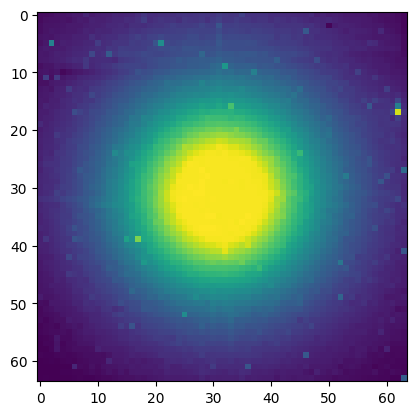

In [15]:
plt.imshow(gray_images[2])

In [16]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(gray_images, distance_data, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((243, 64, 64), (61, 64, 64), (243,), (61,))

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K

In [19]:
batch_size = 443
epochs = 100
# input image dimensions
img_rows, img_cols = 64, 64
#inputshape = X.shape[1]

In [20]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (243, 64, 64, 1)
243 train samples
61 test samples


In [21]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

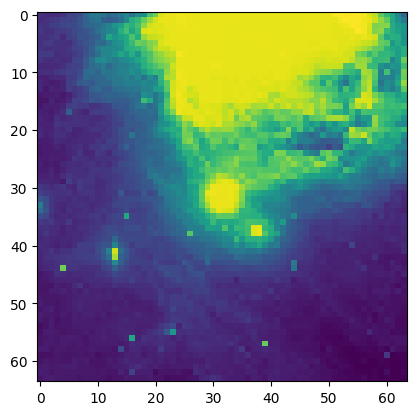

In [22]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape(64, 64))

In [23]:
model = Sequential()
# model.add(Dense(256, activation='relu', input_dim=64))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape = input_shape))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', # one may use 'mean_absolute_error' as  mean_squared_error
                  optimizer='adam',
                  metrics=[r2_keras] # you can add several if needed
                 )

model.summary()

2023-10-15 10:45:50.403189: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-10-15 10:45:50.403218: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-10-15 10:45:50.403228: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-10-15 10:45:50.403730: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-15 10:45:50.404165: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 512)               31490560  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                        

In [24]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/100


2023-10-15 10:46:41.150453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-15 10:46:43.683982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 - 4s - loss: 536064.2500 - r2_keras: -4.3438e-02 - val_loss: 14608.0410 - val_r2_keras: -5.2815e-01 - 4s/epoch - 4s/step
Epoch 2/100
1/1 - 0s - loss: 530512.6250 - r2_keras: -3.2632e-02 - val_loss: 12284.1338 - val_r2_keras: -2.8505e-01 - 198ms/epoch - 198ms/step
Epoch 3/100
1/1 - 0s - loss: 524396.2500 - r2_keras: -2.0727e-02 - val_loss: 10946.6660 - val_r2_keras: -1.4513e-01 - 120ms/epoch - 120ms/step
Epoch 4/100
1/1 - 0s - loss: 517609.8750 - r2_keras: -7.5172e-03 - val_loss: 12734.4648 - val_r2_keras: -3.3216e-01 - 76ms/epoch - 76ms/step
Epoch 5/100
1/1 - 0s - loss: 511606.7188 - r2_keras: 0.0042 - val_loss: 21603.5586 - val_r2_keras: -1.2600e+00 - 73ms/epoch - 73ms/step
Epoch 6/100
1/1 - 0s - loss: 509396.5625 - r2_keras: 0.0085 - val_loss: 37001.1953 - val_r2_keras: -2.8707e+00 - 74ms/epoch - 74ms/step
Epoch 7/100
1/1 - 0s - loss: 513195.1562 - r2_keras: 0.0011 - val_loss: 41843.2266 - val_r2_keras: -3.3772e+00 - 74ms/epoch - 74ms/step
Epoch 8/100
1/1 - 0s - loss: 514522.5000

2/2 - 1s - loss: 509818.0938 - r2_keras: -5.3484e+01 - 1s/epoch - 506ms/step
1/2 [==============>...............] - ETA: 0s

2023-10-15 10:47:03.061346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 143ms/step


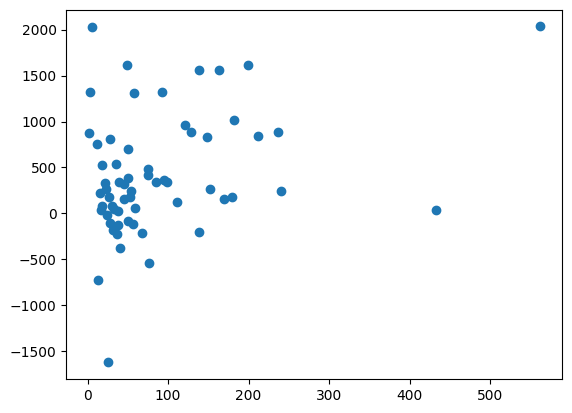

In [25]:
score = model.evaluate(X_test, y_test, verbose=2)
preds = model.predict(X_test)
preds = preds[:,0]
plt.scatter(y_test, preds)

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

-52.33217409372172